In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import openpyxl

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [228]:
path = os.chdir(r"/Users/cts08/Desktop")
os.listdir()
#데이터 불러오기
df1 = pd.read_csv("data_038_1.csv", header = 0 )
df2 = pd.read_excel("schema.xlsx")
df1.head()
temp_dat = df1.copy()

temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['농업']=0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0
temp_dat['전자기기'] = 0
temp_dat['장비 및 화물운송'] = 0
temp_dat['생활서비스'] = 0
temp_dat['전문서비스'] = 0
temp_dat['제조업']=0
temp_dat['교통수단_관리'] = 0



for i in range(1, 167):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif(i == 28):
        temp_dat['농업'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    elif(i == 33):
        temp_dat['전자기기'] += temp_dat[f"B{i}"]
    elif(i >= 124 and i <= 126):
        temp_dat['장비 및 화물운송'] += temp_dat[f"B{i}"]
    elif((i >= 127 and i <= 128) or (i == 133) or (i >= 135 and i <= 136)):
        temp_dat['생활서비스'] += temp_dat[f"B{i}"]
    elif(i >= 128 and i <= 132):
        temp_dat['전문서비스'] += temp_dat[f"B{i}"]
    elif(i >= 150 and i <= 151):
        temp_dat['제조업'] += temp_dat[f"B{i}"]
    elif((i == 119) or (i >= 158 and i <= 159) or (i >= 165 and i <= 166)):
        temp_dat['교통수단_관리'] += temp_dat[f"B{i}"]
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]

In [229]:
# 패턴코드 사용횟수 추출

ori_dat = temp_dat.iloc[:,:-20]
def solution(n):
    N = [int(i) for i in str(n)]
    return sum(N)

In [230]:
ori_dat["E1 사용횟수"] = ori_dat["E1"].apply(lambda x: solution(int(x)))
ori_dat["E2 사용횟수"] = ori_dat["E2"].apply(lambda x: solution(int(x)))
ori_dat["E3 사용횟수"] = ori_dat["E3"].apply(lambda x: solution(int(x)))
ori_dat["E4 사용횟수"] = ori_dat["E4"].apply(lambda x: solution(int(x)))
ori_dat["E5 사용횟수"] = ori_dat["E5"].apply(lambda x: solution(int(x)))
ori_dat["E6 사용횟수"] = ori_dat["E6"].apply(lambda x: solution(int(x)))
ori_dat

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,E3,E4,E5,E6,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,1.111111e+10,0,1.111110e+11,1.100000e+09,0,0,10,0,6,2
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111100e+11,1.000000e+10,0,0,0,0,5,1
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111010e+11,1.011010e+11,0,8,0,0,5,4
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,0,0,0,6,6
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,6,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.011111e+10,6,4,0,0,6,8
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,4,0,0,6,6
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.111110e+11,0,4,0,0,6,6
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,0.000000e+00,0,1.111110e+11,1.101010e+11,0,3,0,0,6,4


In [232]:
# 각 연령별 데이터 필터링
condition20 = (ori_dat.P2 == '20대_후') | (ori_dat.P2 =="20대_초") # 조건식 작성
condition3040 = (ori_dat.P2 == '30대_후') | (ori_dat.P2 =="30대_초") | (ori_dat.P2 == '40대_후') | (ori_dat.P2 =="40대_초")
condition5060 = (ori_dat.P2 == '50대_후') | (ori_dat.P2 =="50대_초") | (ori_dat.P2 == '60대_후') | (ori_dat.P2 =="60대_초")

dat20 = ori_dat[condition20]     # 20대 고객 데이터
dat3040 = ori_dat[condition3040] # 30,40대 고객 데이터
dat5060 = ori_dat[condition5060] # 50,60대 고객 데이터

In [234]:
df_p = dat20.iloc[:, :7]       # 신청정보: 22.6月 신한카드 여신 서비스 신청과 관련된 정보
df_b = dat20.iloc[:, 7:174]    # 결제정보: 22.6月 신한카드를 통한 결제정보
df_c = dat20.iloc[:, 174]      # 이용건수
df_e = dat20.iloc[:, 175:181]  # 패턴코드
df_f = dat20.iloc[:, 181:]     # 패턴코드 횟수

,E1,E2,E3,E4,E5,E6
0,0.000000e+00,0.000000e+00,1.111111e+10,0,1.111110e+11,1.100000e+09
5,0.000000e+00,1.011010e+11,0.000000e+00,0,1.010010e+11,1.000000e+09
6,1.111110e+11,1.000110e+07,0.000000e+00,0,1.111110e+11,1.010110e+11
9,0.000000e+00,1.100110e+11,0.000000e+00,0,1.101110e+11,1.101110e+11
17,0.000000e+00,1.000110e+09,0.000000e+00,0,1.111110e+11,1.110010e+11
...,...,...,...,...,...,...
473200,1.100000e+01,1.000110e+05,1.100111e+08,0,1.111000e+11,1.101000e+11
473204,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00
473217,1.000100e+08,0.000000e+00,0.000000e+00,0,1.000000e+08,1.000000e+08
473222,0.000000e+00,1.000000e+08,0.000000e+00,0,1.111110e+11,1.101110e+11


In [169]:
df_b.sum(axis = 1)

0         8440000
5         1851000
6         2707000
9         4058000
17        2214000
           ...   
473200    4516000
473204    4190000
473217    1840000
473222    2582000
473224    5586000
Length: 48400, dtype: int64

In [251]:
d = df_p.copy()

d.P1 = [int(x=="M") for x in df_p.P1]
x = pd.concat([d.iloc[:,:2], df_b, df_c, df_f], axis=1).drop(["P2"], axis = 1)
x

,P1,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B165,B166,B167,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,1,0,0,0,0,190000,0,101000,0,54000,...,0,0,4350000,210,0,0,10,0,6,2
5,1,0,0,0,0,0,0,0,0,0,...,0,0,970000,30,0,4,0,0,3,2
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1530000,90,6,3,0,0,6,4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,2050000,20,0,4,0,0,5,5
17,1,0,0,0,0,0,0,0,0,0,...,0,0,1110000,110,0,3,0,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,1,0,0,0,0,25000,0,0,0,0,...,0,0,2390000,110,2,3,7,0,4,3
473204,1,0,0,0,0,0,0,0,0,0,...,0,0,2160000,60,0,0,0,0,0,0
473217,1,0,0,0,0,0,0,0,0,0,...,0,0,1030000,70,2,0,0,0,1,1
473222,1,0,0,0,0,0,0,0,0,0,...,0,0,1360000,50,0,1,0,0,6,5


In [252]:
x_data = pd.concat([d.iloc[:,:2], df_b, df_c, df_f], axis=1).drop(["P2"], axis = 1).to_numpy()
y_data = df_p.P3.to_numpy()
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data).unsqueeze(1)

In [240]:
x_train.shape, y_train.shape, x_train.shape[0]
nn.Linear(x_train.shape[1], 1)

Linear(in_features=174, out_features=1, bias=True)

In [241]:
model = nn.Sequential(
    nn.Linear(x_train.shape[1], 1),
    nn.Sigmoid()         # 출력은 시그모이드 함수를 거친다
)

In [242]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 10
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 5번마다 로그 출력
    if epoch % 5 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/10 Cost: 67.665520 Accuracy 32.19%
Epoch    5/10 Cost: 24.405905 Accuracy 75.55%
Epoch   10/10 Cost: 24.405899 Accuracy 75.55%


In [253]:
x1 = x.iloc[:,1:]
x1

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B165,B166,B167,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,0,0,0,0,190000,0,101000,0,54000,0,...,0,0,4350000,210,0,0,10,0,6,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,970000,30,0,4,0,0,3,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1530000,90,6,3,0,0,6,4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,2050000,20,0,4,0,0,5,5
17,0,0,0,0,0,0,0,0,0,0,...,0,0,1110000,110,0,3,0,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,0,0,0,0,25000,0,0,0,0,0,...,0,0,2390000,110,2,3,7,0,4,3
473204,0,0,0,0,0,0,0,0,0,0,...,0,0,2160000,60,0,0,0,0,0,0
473217,0,0,0,0,0,0,0,0,0,0,...,0,0,1030000,70,2,0,0,0,1,1
473222,0,0,0,0,0,0,0,0,0,0,...,0,0,1360000,50,0,1,0,0,6,5


In [246]:
# 회귀분석
from sklearn.linear_model import LogisticRegression


train_x = x1.copy()
train_y = df_p.iloc[:, 2].copy()

In [99]:
model = LogisticRegression(max_iter=10000)
model.fit(train_x.to_numpy(), train_y)

C:\Users\cts08\anaconda3\envs\Pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [100]:
print(model.score(train_x.to_numpy(), train_y))

0.7606818181818182


In [247]:
train_x

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B164,B165,B166,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,0,0,0,0,190000,0,101000,0,54000,0,...,0,0,0,210,0,0,10,0,6,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,30,0,4,0,0,3,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,90,6,3,0,0,6,4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,0,4,0,0,5,5
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,110,0,3,0,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,0,0,0,0,25000,0,0,0,0,0,...,0,0,0,110,2,3,7,0,4,3
473204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,60,0,0,0,0,0,0
473217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,2,0,0,0,1,1
473222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,50,0,1,0,0,6,5


In [254]:
# k-means
from sklearn.preprocessing import MinMaxScaler

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(x1)

from sklearn.cluster import KMeans

k = 5

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cluster = model.fit_predict(data_scale)

In [256]:
x1['Pattern'].value_counts()

1    14978
0    12363
2    10884
4     5741
3     4434
Name: Pattern, dtype: int64

In [308]:
x1

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B166,B167,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,Pattern
0,0,0,0,0,190000,0,101000,0,54000,0,...,0,4350000,210,0,0,10,0,6,2,0
5,0,0,0,0,0,0,0,0,0,0,...,0,970000,30,0,4,0,0,3,2,1
6,0,0,0,0,0,0,0,0,0,0,...,0,1530000,90,6,3,0,0,6,4,4
9,0,0,0,0,0,0,0,0,0,0,...,0,2050000,20,0,4,0,0,5,5,2
17,0,0,0,0,0,0,0,0,0,0,...,0,1110000,110,0,3,0,0,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,0,0,0,0,25000,0,0,0,0,0,...,0,2390000,110,2,3,7,0,4,3,2
473204,0,0,0,0,0,0,0,0,0,0,...,0,2160000,60,0,0,0,0,0,0,1
473217,0,0,0,0,0,0,0,0,0,0,...,0,1030000,70,2,0,0,0,1,1,1
473222,0,0,0,0,0,0,0,0,0,0,...,0,1360000,50,0,1,0,0,6,5,0


In [255]:
x1['Pattern'] = cluster
x1.groupby('Pattern').mean()

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B165,B166,B167,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
Pattern,,,,,,,,,,,,,,,,,,,,,
0,3473.671439,433.309067,394.645313,539.432177,5656.474966,335.355496,10107.659953,1042.060988,9361.158295,516.217747,...,626.627841,445.603818,1.728616e+06,67.946291,0.070857,1.346841,0.224865,0.0,5.577530,3.487179
1,1531.379356,206.569635,197.155829,373.748164,3245.026038,140.873281,7319.668848,1240.953398,6897.449593,355.922019,...,581.786620,193.417012,1.088218e+06,51.767926,0.117706,1.027774,0.117906,0.0,1.680331,0.489651
2,2766.997427,158.857038,180.172731,469.037119,4714.902609,274.439544,9612.918045,1242.833517,9321.940463,508.177141,...,1508.912165,256.339581,2.038241e+06,71.358875,0.105935,5.382672,0.826259,0.0,5.788037,4.776185
3,1510.825440,250.112765,146.368967,293.188994,4184.934596,107.352278,6857.690573,1219.215156,7164.411367,451.059991,...,679.972936,152.007217,1.260959e+06,56.066757,5.673658,1.614569,0.389716,0.0,3.274470,1.246730
4,1920.919700,292.457760,242.292284,726.702665,5307.437729,183.417523,7961.504964,1045.810834,9220.170702,417.348894,...,927.887128,393.311270,2.007952e+06,73.175405,5.983278,4.183418,0.842710,0.0,5.948615,5.090925


In [ ]:
# [34, 35, 62, 107, 109, 150, 162, 165, 168, 169]

In [291]:
x2 = x1[["Pattern","B33","B34","B61","B106","B108","B149","B161","B164","B167","C1"]]
x2
# "전자상거래_다품목취급","결제대행_PG","통신요금_이동시내전화","생명보험","일반전문학원","제약회사","주유소","가정용연료","총액","이용건수"

,Pattern,B33,B34,B61,B106,B108,B149,B161,B164,B167,C1
0,0,135000,764000,283000,0,0,0,70000,0,4350000,210
5,1,228000,224000,52000,0,0,0,170000,0,970000,30
6,4,38000,224000,0,0,0,0,0,0,1530000,90
9,2,0,0,174000,0,0,0,0,0,2050000,20
17,0,0,36000,0,0,0,0,50000,0,1110000,110
...,...,...,...,...,...,...,...,...,...,...,...
473200,2,237000,326000,129000,0,0,0,150000,0,2390000,110
473204,1,60000,1136000,24000,0,0,0,0,0,2160000,60
473217,1,19000,52000,0,0,0,0,170000,0,1030000,70
473222,0,0,24000,0,0,0,0,200000,0,1360000,50


In [292]:
df1 = pd.concat([df_p.iloc[:,:3],x2], axis = 1)
df1

,P1,P2,P3,Pattern,B33,B34,B61,B106,B108,B149,B161,B164,B167,C1
0,M,20대_후,1,0,135000,764000,283000,0,0,0,70000,0,4350000,210
5,M,20대_후,0,1,228000,224000,52000,0,0,0,170000,0,970000,30
6,M,20대_후,0,4,38000,224000,0,0,0,0,0,0,1530000,90
9,F,20대_후,0,2,0,0,174000,0,0,0,0,0,2050000,20
17,M,20대_후,1,0,0,36000,0,0,0,0,50000,0,1110000,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,M,20대_후,1,2,237000,326000,129000,0,0,0,150000,0,2390000,110
473204,M,20대_후,1,1,60000,1136000,24000,0,0,0,0,0,2160000,60
473217,M,20대_후,1,1,19000,52000,0,0,0,0,170000,0,1030000,70
473222,M,20대_후,1,0,0,24000,0,0,0,0,200000,0,1360000,50


In [295]:
df0_1 = df1.loc[(df1["Pattern"] == 0) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df0_0 = df1.loc[(df1["Pattern"] == 0) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df1_1 = df1.loc[(df1["Pattern"] == 1) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df1_0 = df1.loc[(df1["Pattern"] == 1) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df2_1 = df1.loc[(df1["Pattern"] == 2) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df2_0 = df1.loc[(df1["Pattern"] == 2) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df3_1 = df1.loc[(df1["Pattern"] == 3) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df3_0 = df1.loc[(df1["Pattern"] == 3) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df4_1 = df1.loc[(df1["Pattern"] == 4) & (df1["P3"] == 1)].iloc[:,3:].mean().round()
df4_0 = df1.loc[(df1["Pattern"] == 4) & (df1["P3"] == 0)].iloc[:,3:].mean().round()

df0_minus = df0_1 - df0_0
df1_minus = df1_1 - df1_0
df2_minus = df2_1 - df2_0
df3_minus = df3_1 - df3_0
df4_minus = df4_1 - df4_0

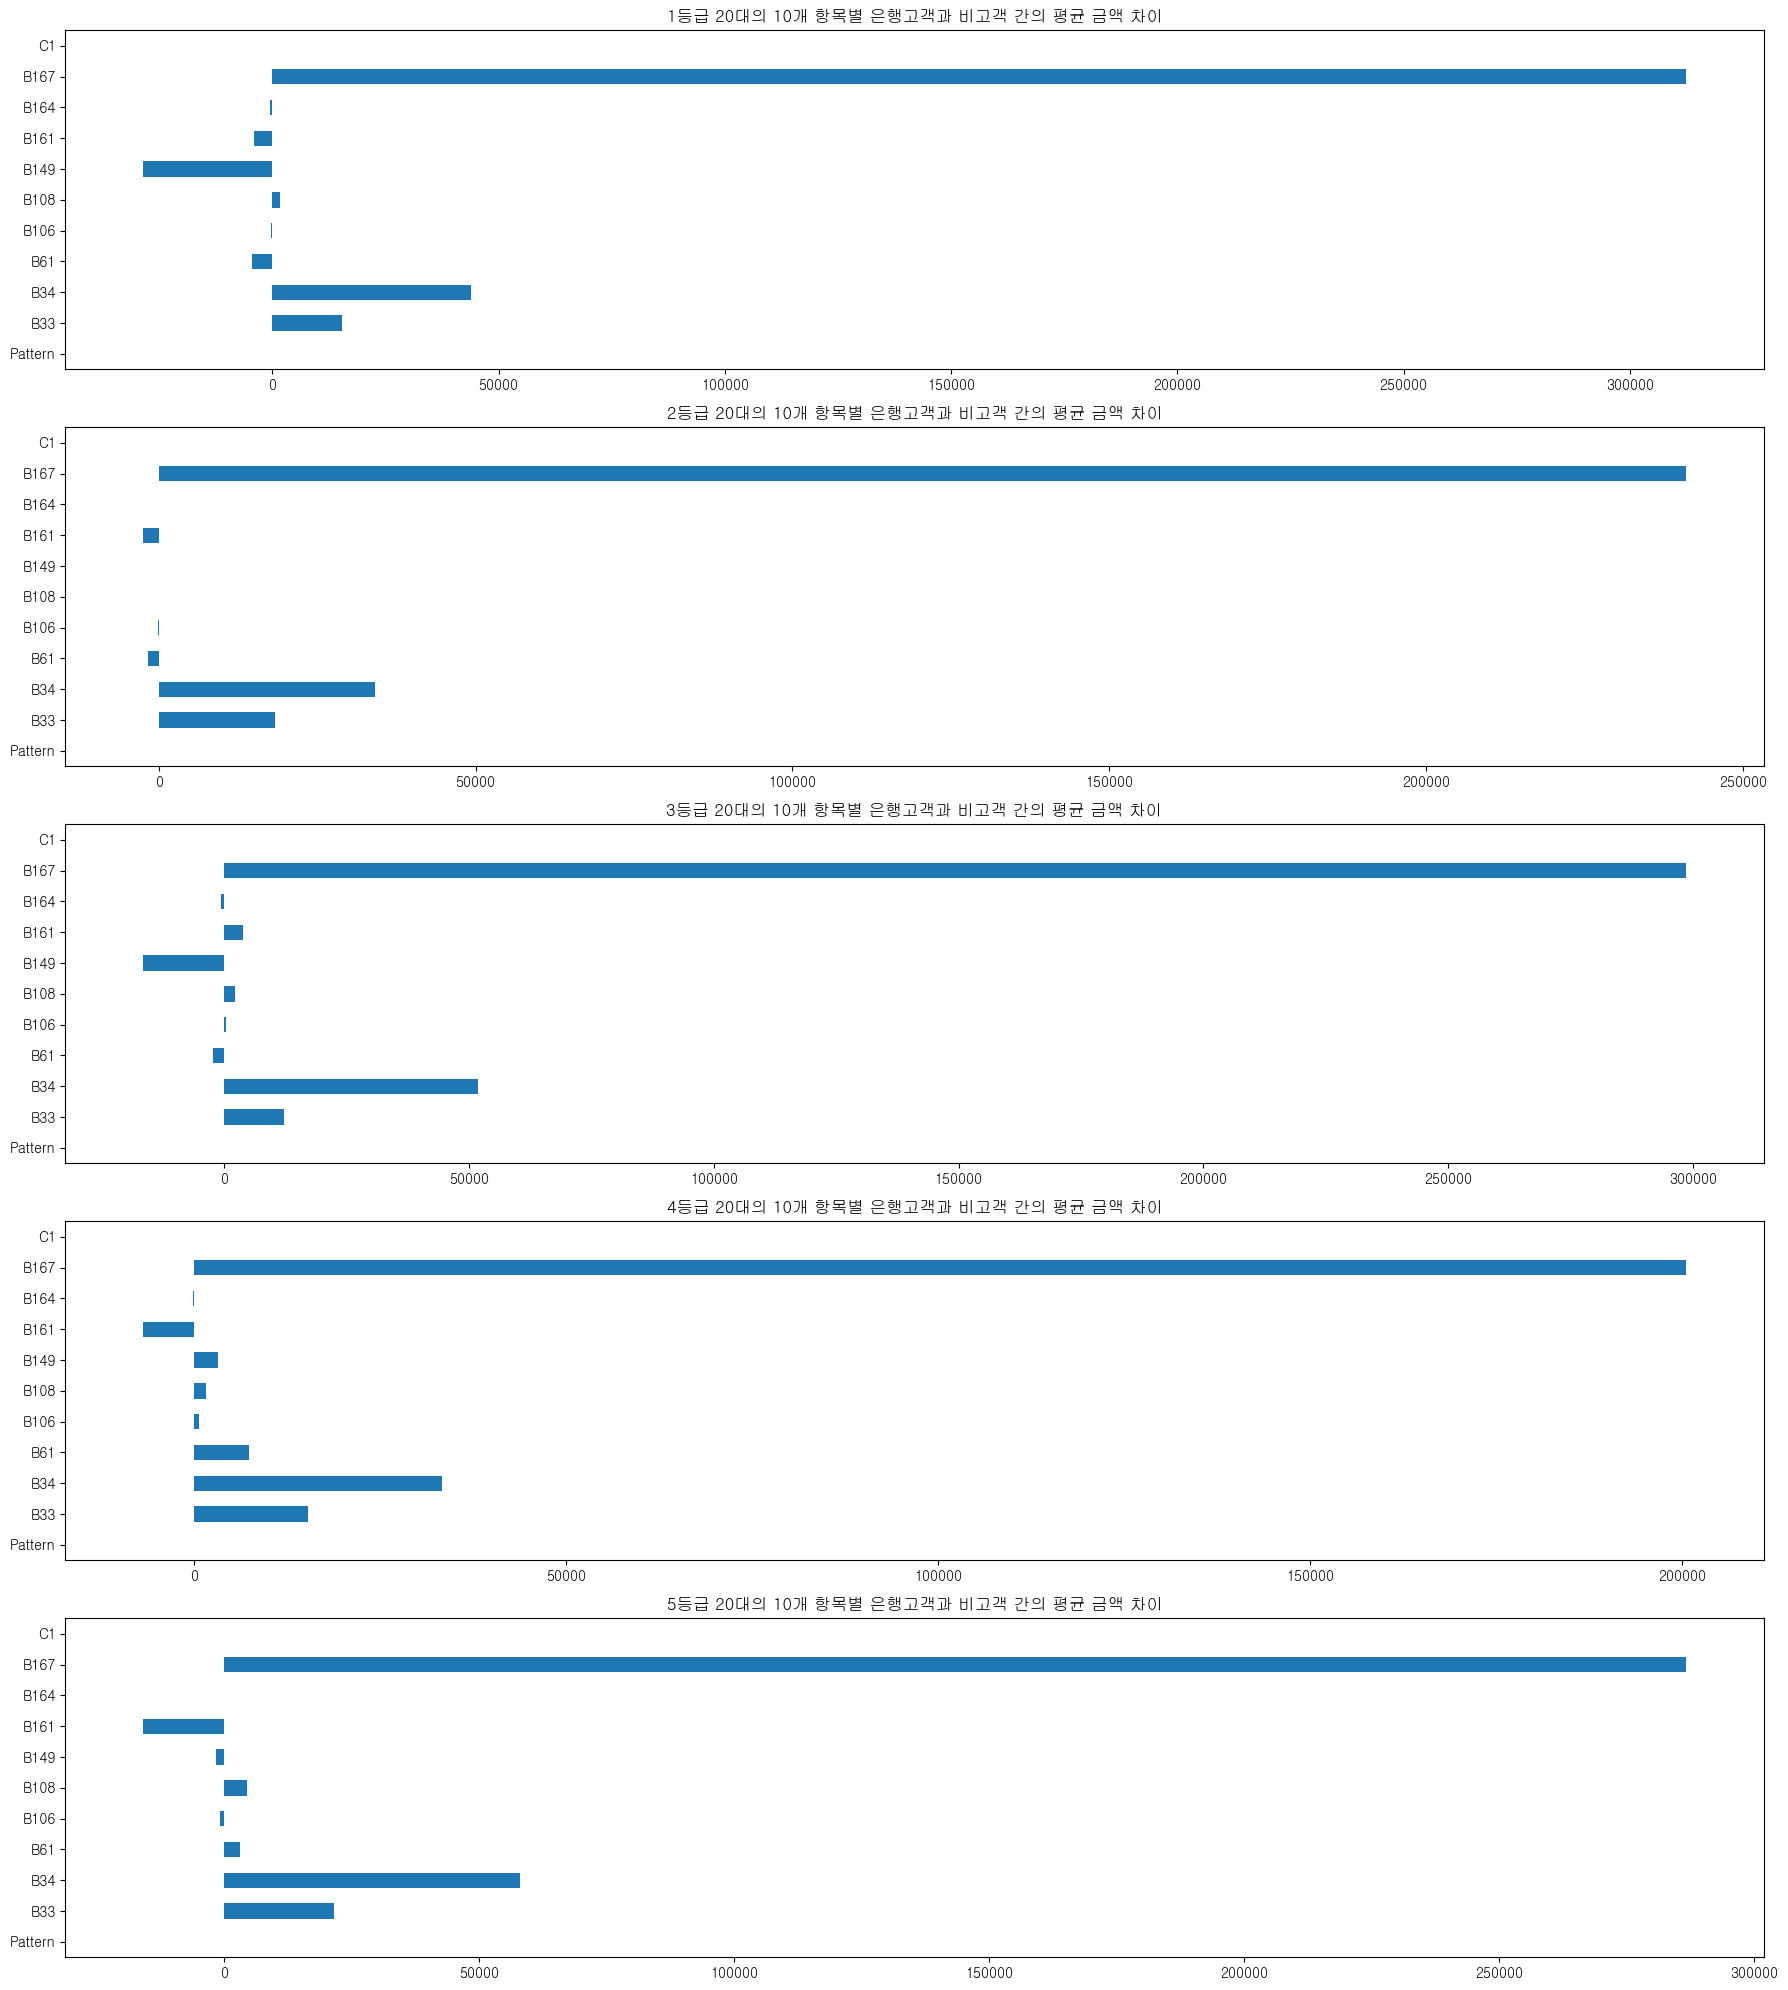

In [307]:
plt.figure(figsize=(18,20))

plt.subplot(5,1,1)
plt.title("1등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df0_minus.plot.barh(df0_minus.index, df0_minus.values)

plt.subplot(5,1,2)
plt.title("2등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df1_minus.plot.barh(df1_minus.index, df1_minus.values)

plt.subplot(5,1,3)
plt.title("3등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df2_minus.plot.barh(df2_minus.index, df2_minus.values)

plt.subplot(5,1,4)
plt.title("4등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df3_minus.plot.barh(df3_minus.index, df3_minus.values)

plt.subplot(5,1,5)
plt.title("5등급 20대의 10개 항목별 은행고객과 비고객 간의 평균 금액 차이")
df4_minus.plot.barh(df4_minus.index, df4_minus.values)

plt.tight_layout()
plt.show()

In [158]:
# k-means
from sklearn.preprocessing import MinMaxScaler

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(train_x)

In [159]:
from sklearn.cluster import KMeans

k = 9

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cluster = model.fit_predict(data_scale)

In [160]:
train_x['Pattern'] = cluster

In [162]:
train_x["Pattern"].value_counts()

3    10705
6     7364
2     6435
1     6309
0     5785
4     3520
8     3234
5     3166
7     1882
Name: Pattern, dtype: int64

In [163]:
model = LogisticRegression(max_iter=10000)
model.fit(train_x.to_numpy(), train_y)
print(model.score(train_x.to_numpy(), train_y))

0.7605371900826446


C:\Users\cts08\anaconda3\envs\Pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
train_x

,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,...,B165,B166,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수,Pattern
0,190000,0,101000,0,54000,0,341000,0,24000,0,...,0,0,210,0,0,10,0,6,2,7
5,0,0,0,0,0,0,0,0,0,0,...,0,0,30,0,4,0,0,3,2,0
6,0,0,0,0,0,0,265000,0,0,0,...,0,0,90,6,3,0,0,6,4,5
9,0,0,0,0,0,0,0,0,0,0,...,0,0,20,0,4,0,0,5,5,2
17,0,0,0,0,0,0,4000,0,21000,0,...,0,0,110,0,3,0,0,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,25000,0,0,0,0,0,0,0,0,0,...,0,0,110,2,3,7,0,4,3,7
473204,0,0,0,0,0,0,0,0,0,0,...,0,0,60,0,0,0,0,0,0,3
473217,0,0,0,0,0,0,0,0,10000,0,...,0,0,70,2,0,0,0,1,1,3
473222,0,0,0,0,0,0,0,0,0,0,...,0,0,50,0,1,0,0,6,5,1


In [9]:
# 은행 고객과 비 고객을 나눈 데이터

p_dat = temp_dat.loc[temp_dat["P3"] == 1]
np_dat = temp_dat.loc[temp_dat["P3"] == 0]
# 마찬가지로 고객과 비고객별 성별, 연령, 성별 및 연령의 데이터 그래프 추세 파악 가능(코드는 아래랑 동일하게 짜면 될듯)

In [10]:
# 전체 데이터 중 성별 및 연령별 그룹된 항목만 추출한 데이터

a_dat = temp_dat.groupby(['P1','P2']).mean().iloc[:,-20:]
a_mean = a_dat.round(decimals=0)
a_mean

# 전체 데이터 중 성별을 먼저 나눈 후 각 성별에서의 연령별 그룹된 항목만 추출한 데이터

female_dat = temp_dat.groupby("P1").get_group("F")
f_age = female_dat.groupby(['P1','P2']).mean().iloc[:,-20:]
male_dat = temp_dat.groupby("P1").get_group("M")
m_age = male_dat.groupby(['P1','P2']).mean().iloc[:,-20:]

# 전체 데이터 중 연령을 먼저 나눈 후 각 연령에서의 성별에 따른 그룹된 항목만 추출한 데이터
age_2a = temp_dat.groupby("P2").get_group("20대_초").iloc[:,-20:].mean()
age_2b = temp_dat.groupby("P2").get_group("20대_후").iloc[:,-20:].mean()
age_3a = temp_dat.groupby("P2").get_group("30대_초").iloc[:,-20:].mean()
age_3b = temp_dat.groupby("P2").get_group("30대_후").iloc[:,-20:].mean()
age_4a = temp_dat.groupby("P2").get_group("40대_초").iloc[:,-20:].mean()
age_4b = temp_dat.groupby("P2").get_group("40대_후").iloc[:,-20:].mean()
age_5a = temp_dat.groupby("P2").get_group("50대_초").iloc[:,-20:].mean()
age_5b = temp_dat.groupby("P2").get_group("50대_후").iloc[:,-20:].mean()
age_6a = temp_dat.groupby("P2").get_group("60대_초").iloc[:,-20:].mean()
age_6b = temp_dat.groupby("P2").get_group("60대_후").iloc[:,-20:].mean()

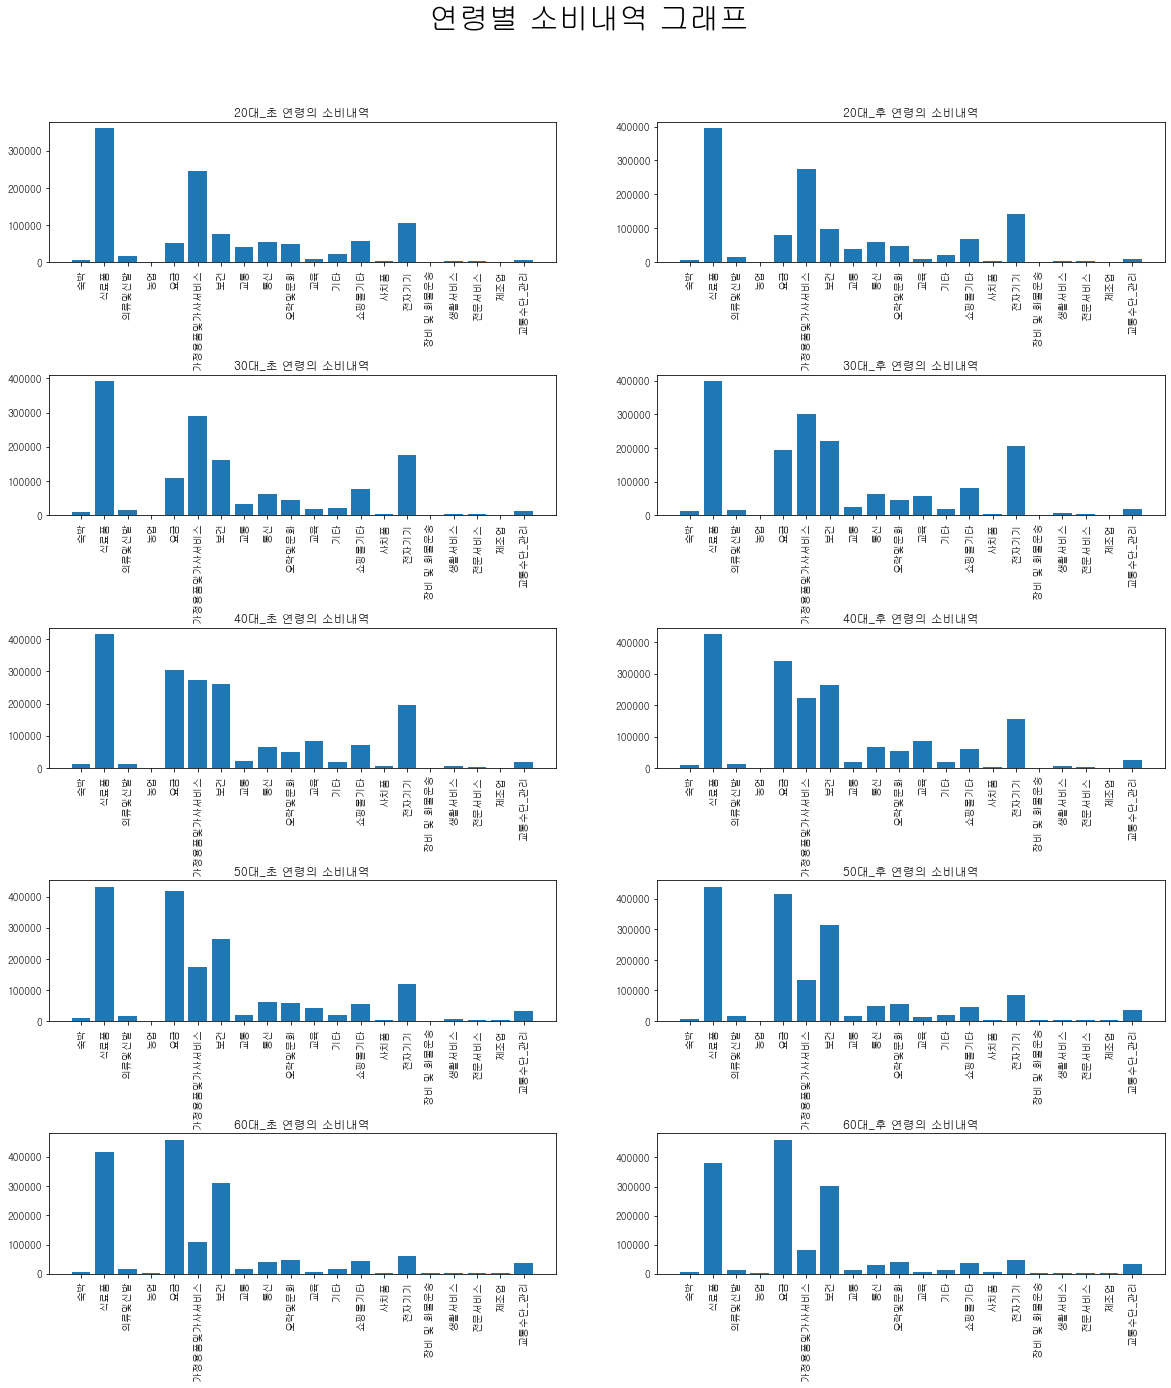

In [11]:
plt.figure(figsize=(20,20))


plt.subplot(5,2,1)
plt.title("20대_초 연령의 소비내역")
plt.bar(x = age_2a.index, height = age_2a)
plt.xticks(rotation = 90)

plt.subplot(5,2,2)
plt.title("20대_후 연령의 소비내역")
plt.bar(x = age_2b.index, height = age_2b)
plt.xticks(rotation = 90)

plt.subplot(5,2,3)
plt.title("30대_초 연령의 소비내역")
plt.bar(x = age_3a.index, height = age_3a)
plt.xticks(rotation = 90)

plt.subplot(5,2,4)
plt.title("30대_후 연령의 소비내역")
plt.bar(x = age_3b.index, height = age_3b)
plt.xticks(rotation = 90)

plt.subplot(5,2,5)
plt.title("40대_초 연령의 소비내역")
plt.bar(x = age_4a.index, height = age_4a)
plt.xticks(rotation = 90)

plt.subplot(5,2,6)
plt.title("40대_후 연령의 소비내역")
plt.bar(x = age_4b.index, height = age_4b)
plt.xticks(rotation = 90)

plt.subplot(5,2,7)
plt.title("50대_초 연령의 소비내역")
plt.bar(x = age_5a.index, height = age_5a)
plt.xticks(rotation = 90)

plt.subplot(5,2,8)
plt.title("50대_후 연령의 소비내역")
plt.bar(x = age_5b.index, height = age_5b)
plt.xticks(rotation = 90)

plt.subplot(5,2,9)
plt.title("60대_초 연령의 소비내역")
plt.bar(x = age_6a.index, height = age_6a)
plt.xticks(rotation = 90)

plt.subplot(5,2,10)
plt.title("60대_후 연령의 소비내역")
plt.bar(x = age_6b.index, height = age_6b)
plt.xticks(rotation = 90)

plt.suptitle("연령별 소비내역 그래프", fontsize = 30)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.80)
plt.show()

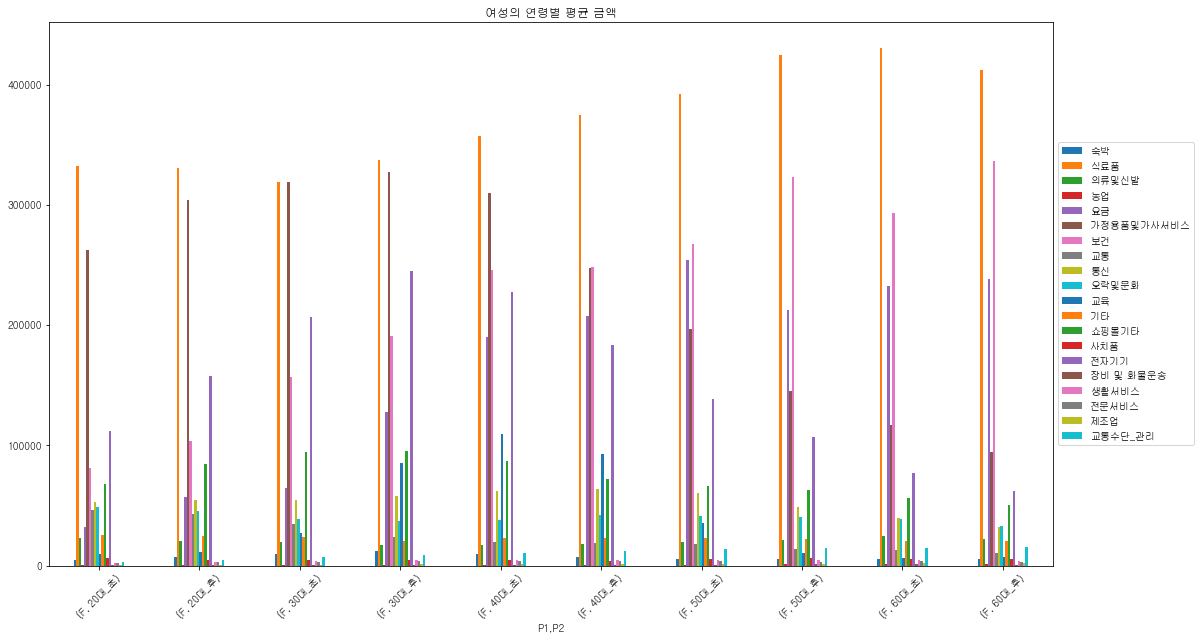

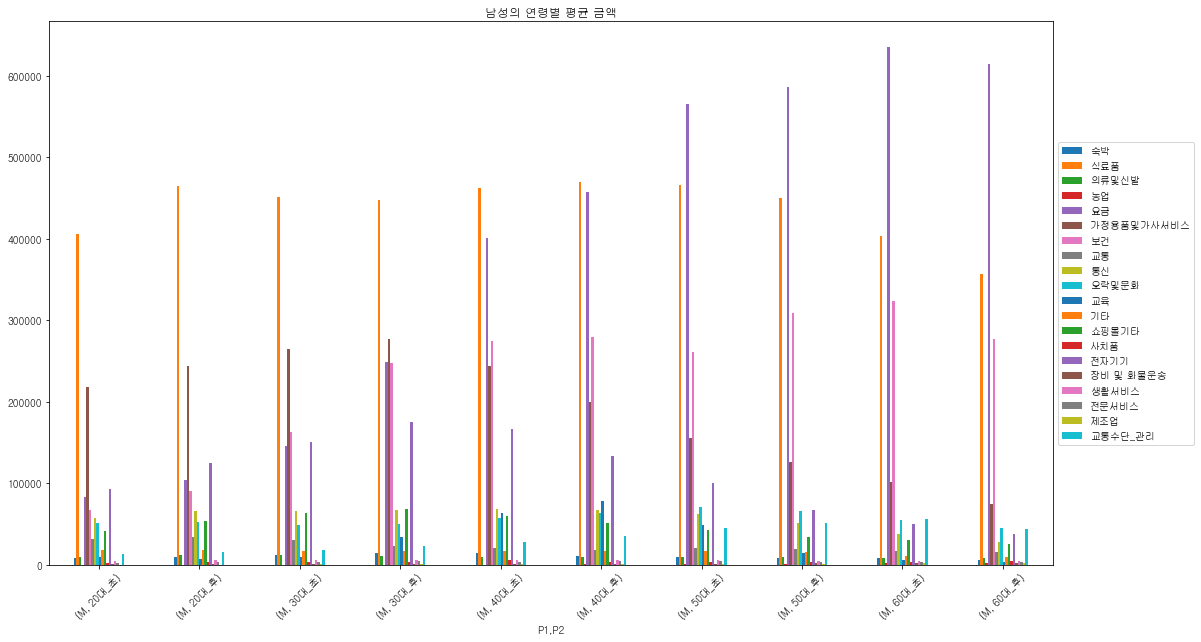

In [12]:
f_age.plot.bar(rot=0, figsize = (18,10))
plt.title("여성의 연령별 평균 금액")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

m_age.plot.bar(rot=0, figsize = (18,10))
plt.title("남성의 연령별 평균 금액")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

plt.show()

In [13]:
# 은행과 증권사 별 데이터

temp_dat_A은행 = temp_dat.loc[temp_dat["P7"]  == "A은행"]
temp_dat_A증권사 = temp_dat.loc[temp_dat["P7"]  == "A증권사"]
temp_dat_B은행 = temp_dat.loc[temp_dat["P7"]  == "B은행"]
temp_dat_B증권사 = temp_dat.loc[temp_dat["P7"]  == "B증권사"]

temp_dat_A은행_p30 = temp_dat_A은행.loc[temp_dat["P3"]  == 1]
temp_dat_A증권사_p30 = temp_dat_A증권사.loc[temp_dat["P3"]  == 1]
temp_dat_B은행_p30 = temp_dat_B은행.loc[temp_dat["P3"]  == 1]
temp_dat_B증권사_p30 = temp_dat_B증권사.loc[temp_dat["P3"]  == 1]

temp_dat_A은행_p3x = temp_dat_A은행.loc[temp_dat["P3"]  == 0]
temp_dat_A증권사_p3x = temp_dat_A증권사.loc[temp_dat["P3"]  == 0]
temp_dat_B은행_p3x = temp_dat_B은행.loc[temp_dat["P3"]  == 0]
temp_dat_B증권사_p3x = temp_dat_B증권사.loc[temp_dat["P3"]  == 0]

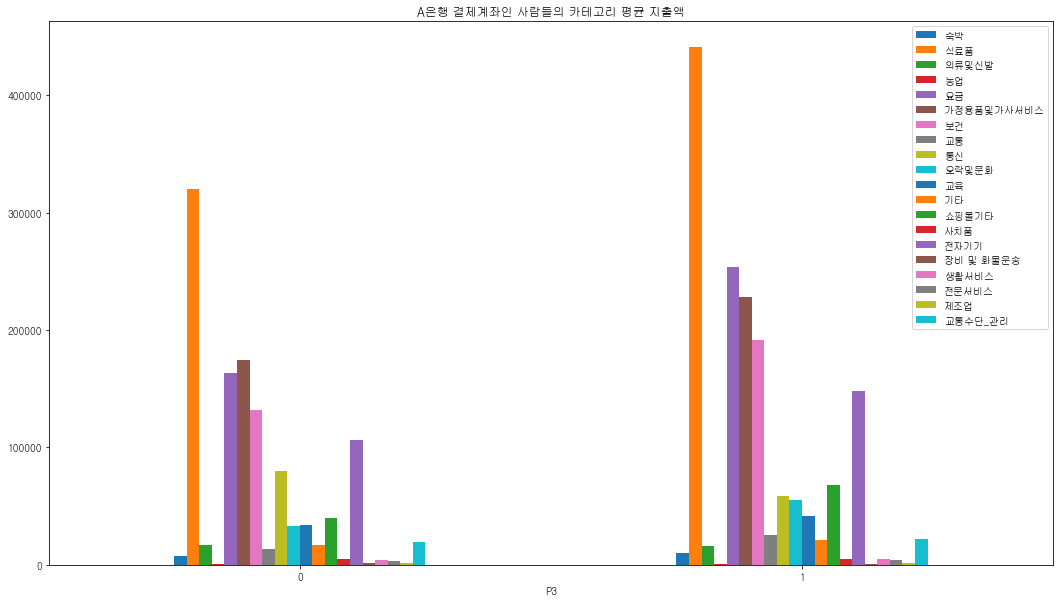

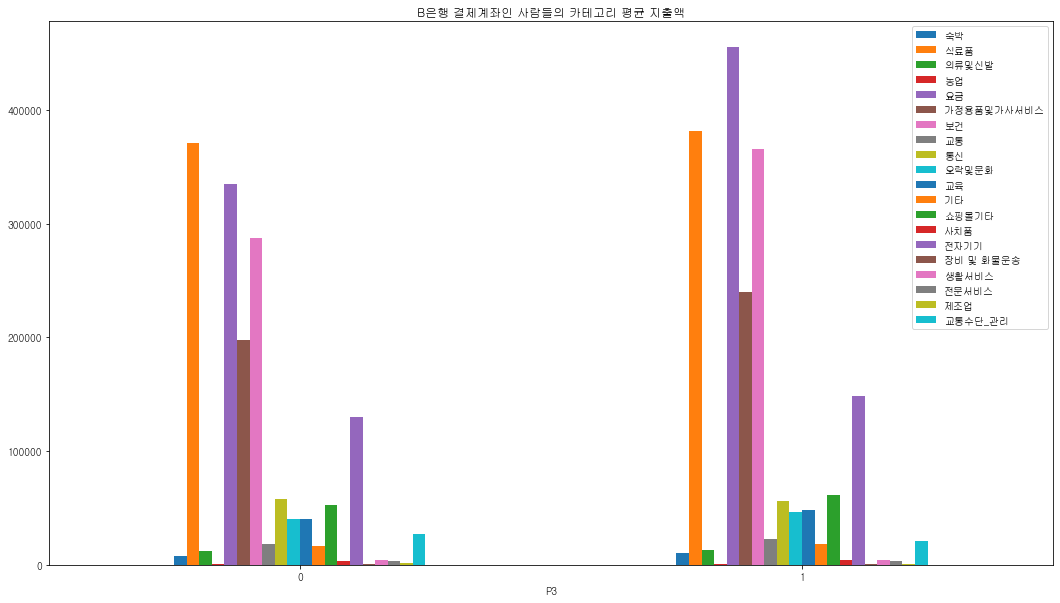

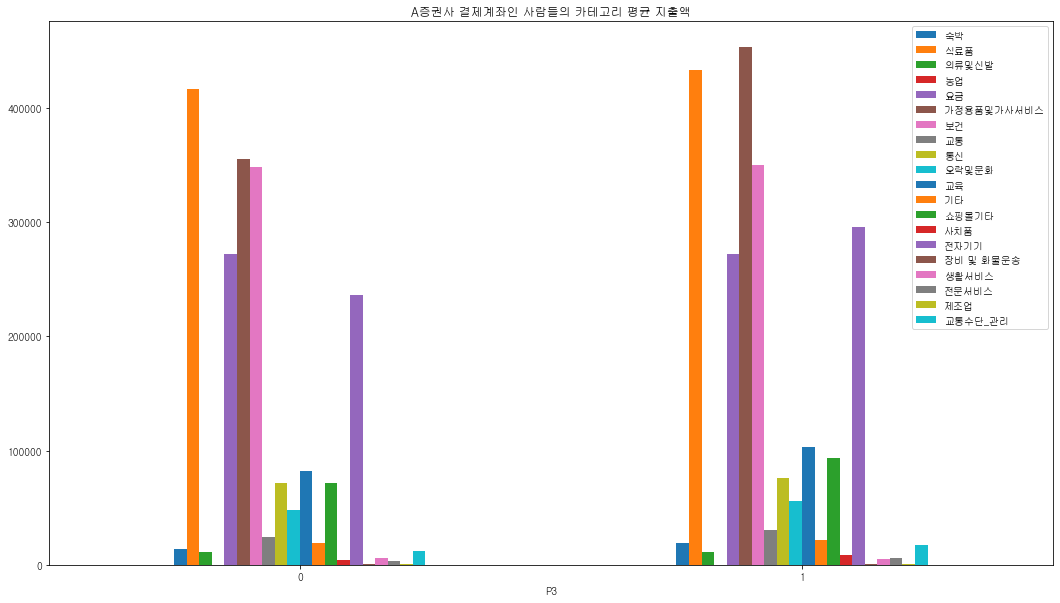

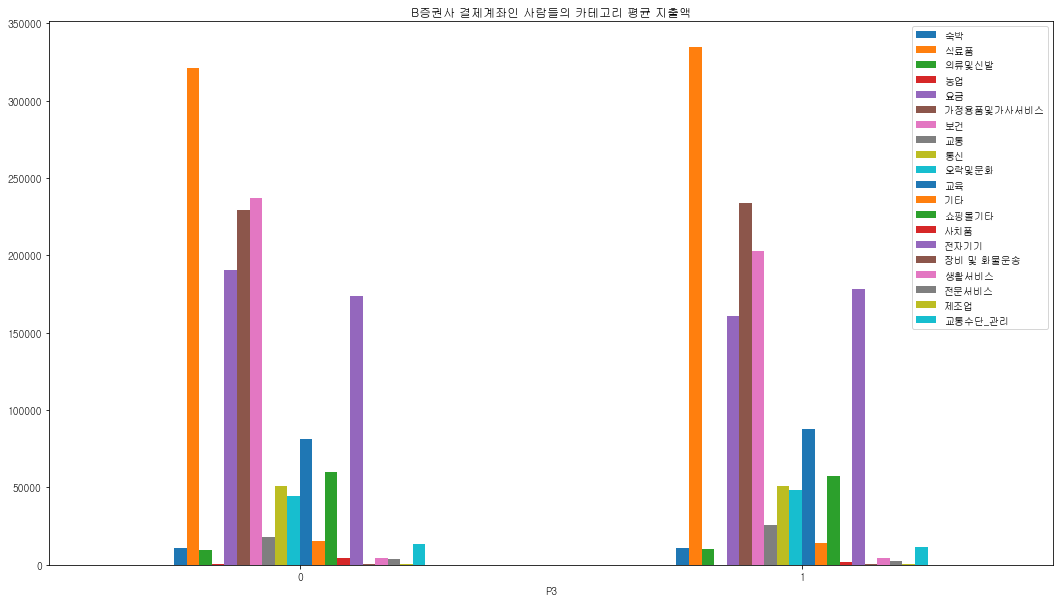

In [25]:
# 긱 은행과 증권사별 평균 지출액 비교 그래프

temp_groupby = temp_dat_A은행.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("A은행 결제계좌인 사람들의 카테고리 평균 지출액")

temp_groupby = temp_dat_B은행.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("B은행 결제계좌인 사람들의 카테고리 평균 지출액")

temp_groupby = temp_dat_A증권사.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("A증권사 결제계좌인 사람들의 카테고리 평균 지출액")

temp_groupby = temp_dat_B증권사.groupby(["P3"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -20:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("B증권사 결제계좌인 사람들의 카테고리 평균 지출액")

plt.show()

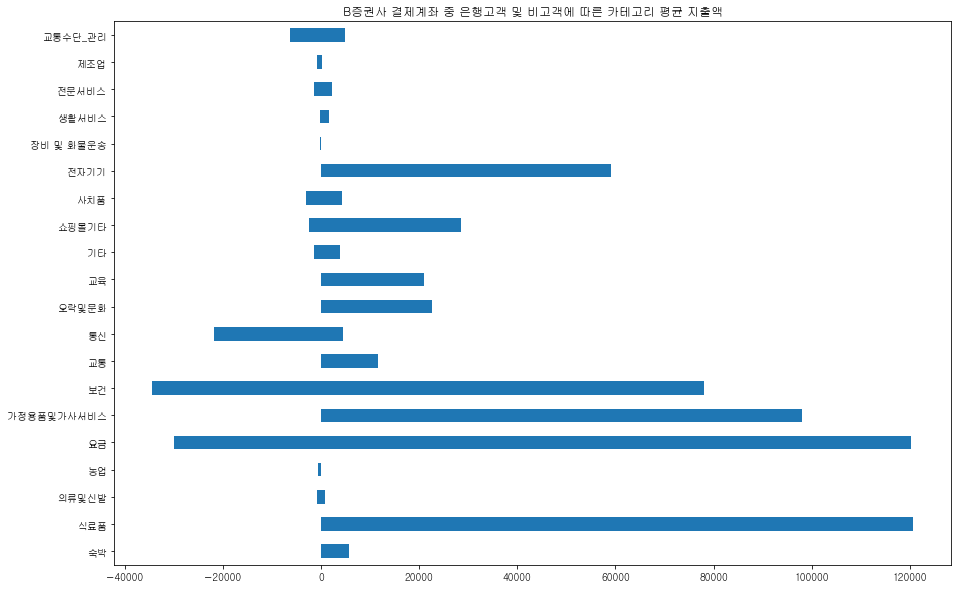

In [28]:
diff = temp_dat_A은행_p30.iloc[:, -20:].mean().round(3) - temp_dat_A은행_p3x.iloc[:, -20:].mean().round(3)
plt.title("A은행 결제계좌 중 은행고객 및 비고객에 따른 카테고리 평균 지출액")
diff.plot.barh(x=diff.index, y=diff.values, figsize = (15,10))

diff = temp_dat_A증권사_p30.iloc[:, -20:].mean().round(3) - temp_dat_A증권사_p3x.iloc[:, -20:].mean().round(3)
plt.title("A증권사 결제계좌 중 은행고객 및 비고객에 따른 카테고리 평균 지출액")
diff.plot.barh(x=diff.index, y=diff.values, figsize = (15,10))

diff = temp_dat_B은행_p30.iloc[:, -20:].mean().round(3) - temp_dat_B은행_p3x.iloc[:, -20:].mean().round(3)
plt.title("B은행 결제계좌 중 은행고객 및 비고객에 따른 카테고리 평균 지출액")
diff.plot.barh(x=diff.index, y=diff.values, figsize = (15,10))

diff = temp_dat_B증권사_p30.iloc[:, -20:].mean().round(3) - temp_dat_B증권사_p3x.iloc[:, -20:].mean().round(3)
plt.title("B증권사 결제계좌 중 은행고객 및 비고객에 따른 카테고리 평균 지출액")
diff.plot.barh(x=diff.index, y=diff.values)

plt.show()

In [27]:
diff

숙박              255.261
식료품           13838.640
의류및신발           836.902
농업             -223.909
요금           -29978.820
가정용품및가사서비스     4979.523
보건           -34376.680
교통             7204.471
통신              -43.766
오락및문화          4154.676
교육             6294.613
기타            -1379.500
쇼핑몰기타         -2413.993
사치품           -2998.105
전자기기           4870.488
장비 및 화물운송      -166.880
생활서비스            71.959
전문서비스         -1355.851
제조업             -66.565
교통수단_관리       -1601.166
dtype: float64

In [185]:
x1.iloc[:,3:]

,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,...,B164,B165,B166,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
0,0,190000,0,101000,0,54000,0,341000,0,24000,...,0,0,0,210,0,0,10,0,6,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,30,0,4,0,0,3,2
6,0,0,0,0,0,0,0,265000,0,0,...,0,0,0,90,6,3,0,0,6,4
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,0,4,0,0,5,5
17,0,0,0,0,0,0,0,4000,0,21000,...,0,0,0,110,0,3,0,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,0,25000,0,0,0,0,0,0,0,0,...,0,0,0,110,2,3,7,0,4,3
473204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,60,0,0,0,0,0,0
473217,0,0,0,0,0,0,0,0,0,10000,...,0,0,0,70,2,0,0,0,1,1
473222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,50,0,1,0,0,6,5


In [189]:
a_corr = x1.iloc[:,4:].corr()
a_corr

,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,...,B164,B165,B166,C1,E1 사용횟수,E2 사용횟수,E3 사용횟수,E4 사용횟수,E5 사용횟수,E6 사용횟수
B5,1.000000,0.000685,0.004094,0.013916,0.015963,0.007857,0.066529,-0.000711,0.014119,0.013489,...,-0.003989,-0.000767,0.054311,0.090120,0.004443,-0.002008,0.016198,NaN,0.022060,0.040354
B6,0.000685,1.000000,0.024608,-0.003848,-0.005809,-0.000781,0.007050,-0.000230,0.015254,0.000852,...,-0.002177,-0.000668,-0.000535,0.006943,-0.003133,-0.000771,-0.005949,NaN,0.005069,0.008142
B7,0.004094,0.024608,1.000000,-0.000549,0.010486,0.000556,0.007048,0.001755,0.016269,-0.003272,...,0.011069,-0.000495,-0.001529,0.015890,-0.006061,-0.000192,-0.010332,NaN,0.007777,0.017863
B8,0.013916,-0.003848,-0.000549,1.000000,0.004189,0.000523,0.027791,-0.001218,0.009780,-0.002414,...,0.003452,-0.003501,-0.002133,0.029134,-0.004973,0.006487,-0.001845,NaN,-0.012543,-0.015967
B9,0.015963,-0.005809,0.010486,0.004189,1.000000,-0.002917,0.054676,-0.001709,0.025806,-0.004758,...,-0.000605,-0.006501,-0.003676,0.070369,-0.000683,0.014775,-0.022677,NaN,0.029824,0.040731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2 사용횟수,-0.002008,-0.000771,-0.000192,0.006487,0.014775,0.001180,0.091814,-0.003838,0.024995,0.006188,...,0.021412,0.009382,-0.000832,0.098934,0.123140,1.000000,0.195858,NaN,0.435426,0.459084
E3 사용횟수,0.016198,-0.005949,-0.010332,-0.001845,-0.022677,0.005723,0.065263,-0.000891,-0.001888,0.001126,...,0.008592,0.005180,-0.000564,0.046075,0.088001,0.195858,1.000000,NaN,0.131645,0.144136
E4 사용횟수,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E5 사용횟수,0.022060,0.005069,0.007777,-0.012543,0.029824,0.000995,0.088332,0.005499,0.025104,0.008337,...,0.031493,0.005453,0.004759,0.187826,0.121975,0.435426,0.131645,NaN,1.000000,0.699889
